# Decision Tree Wine Dataset

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
RANDOM_SEED = 9
DATASPLIT = 0.3

In [3]:
dataset = load_wine(as_frame=True)


data = dataset.data
labels = dataset.target

data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size=DATASPLIT, random_state=RANDOM_SEED)

data_train, data_val, label_train, label_val = train_test_split(data_train, label_train, test_size=DATASPLIT, random_state=RANDOM_SEED)

print(f"Train dataset length: {len(data_train)}, Validation dataset length: {len(data_val)}, Test dataset length: {len(data_test)}")
data_train.describe()


Train dataset length: 86, Validation dataset length: 38, Test dataset length: 54


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,12.876047,2.184302,2.370930,19.934884,100.662791,2.271047,2.036628,0.363721,1.563140,4.805116,0.975814,2.587442,694.802326
std,0.805175,1.053040,0.285248,3.332400,15.145266,0.635097,0.969213,0.122887,0.591185,2.291642,0.249284,0.731654,283.163965
min,11.030000,0.740000,1.360000,10.600000,78.000000,1.150000,0.490000,0.130000,0.410000,1.900000,0.480000,1.290000,278.000000
25%,12.237500,1.510000,2.262500,18.000000,88.000000,1.710000,1.300000,0.270000,1.250000,2.910000,0.772500,2.022500,495.000000
50%,12.855000,1.755000,2.360000,20.000000,98.500000,2.225000,2.035000,0.340000,1.555000,4.440000,0.985000,2.775000,622.500000
75%,13.545000,2.740000,2.555000,22.000000,108.000000,2.740000,2.755000,0.445000,1.892500,5.847500,1.120000,3.127500,871.250000
max,14.230000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.710000,4.000000,1450.000000


In [4]:
parameters = {
    'max_depth': range(3,20)
}

clf = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_SEED), parameters, n_jobs=4)

clf.fit(data_val, label_val)

model = clf.best_estimator_
print("Best corssvalidation score: ", clf.best_score_)
print("With parameters: ", clf.best_params_)

print("Training model with best parameters")
model.fit(data_train, label_train)

accuracy = model.score(data_test, label_test)
print("Accuracy: ", accuracy)

predictions = model.predict(data_test)
f1 = f1_score(label_test, predictions, average='weighted')

print("F1 score: ", f1)



Best corssvalidation score:  0.8178571428571428
With parameters:  {'max_depth': 3}
Training model with best parameters
Accuracy:  0.9629629629629629
F1 score:  0.9629629629629629


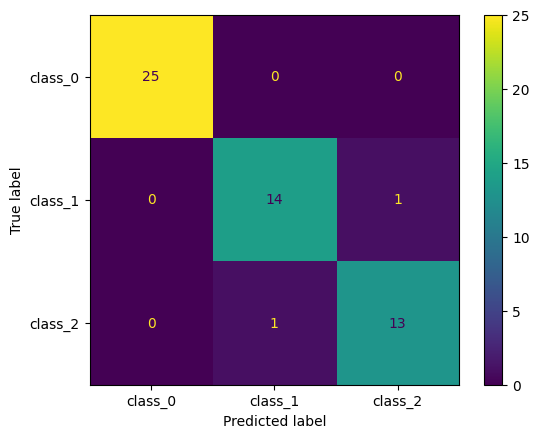

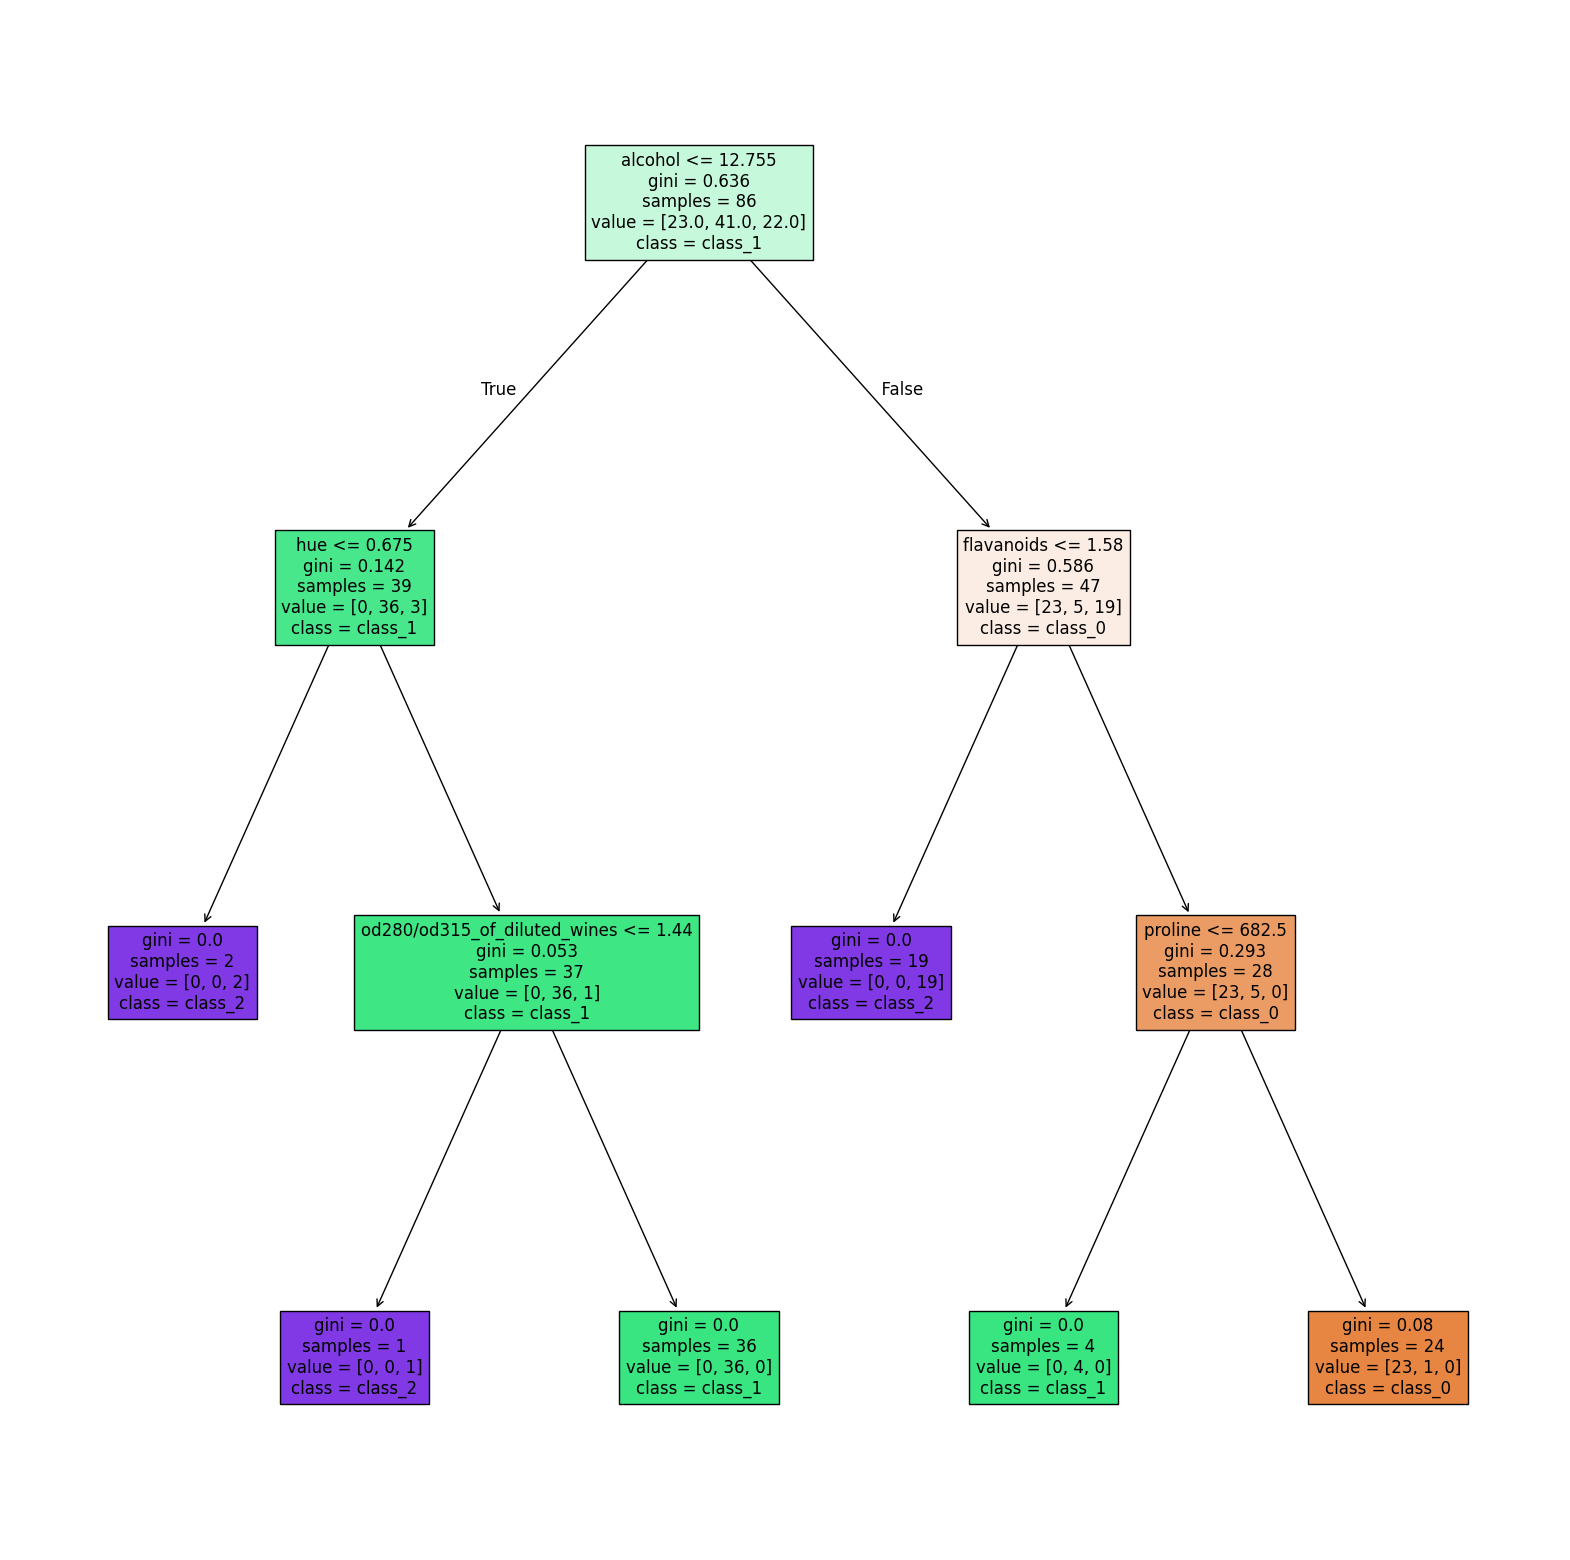

In [5]:
cm = confusion_matrix(label_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.target_names)
disp.plot()
plt.show()

plt.figure(figsize=(20,20))
plot_tree(model, filled=True, feature_names=dataset.feature_names, class_names=dataset.target_names)
plt.show()